In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ZHVI_September22_Processed.csv', dtype=str)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['ZHVI'] = df['ZHVI'].astype(float)

In [3]:
df

,Date,ZHVI,ZipCode,SizeRank,State,City,Metro,CountyName,Location
0,2000-01-31,106672.0,77449,0,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"Katy, TX 77449"
1,2000-02-29,106685.0,77449,0,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"Katy, TX 77449"
2,2000-03-31,106488.0,77449,0,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"Katy, TX 77449"
3,2000-04-30,106493.0,77449,0,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"Katy, TX 77449"
4,2000-05-31,106524.0,77449,0,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"Katy, TX 77449"
...,...,...,...,...,...,...,...,...,...
7481014,2022-05-31,61496.0,62362,30657,IL,Perry,NaN,Pike County,"Perry, IL 62362"
7481015,2022-06-30,62014.0,62362,30657,IL,Perry,NaN,Pike County,"Perry, IL 62362"
7481016,2022-07-31,62707.0,62362,30657,IL,Perry,NaN,Pike County,"Perry, IL 62362"
7481017,2022-08-31,62794.0,62362,30657,IL,Perry,NaN,Pike County,"Perry, IL 62362"


In [4]:
df_zhvf = pd.read_csv('ZHVF/ZHVF_June.csv', dtype=str)

In [5]:
df_zhvf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2022-07-31,2022-09-30,2023-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,2022-06-30,0.4,1.1,3.4
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,2022-06-30,0.9,2.5,3.7
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,2022-06-30,0.3,0.8,2.7
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,2022-06-30,0.9,2.5,6.2
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,2022-06-30,0.9,2.5,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21129,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2022-06-30,1.0,2.3,8.6
21130,97088,34430,93009,Zip,CA,CA,Maricopa,Oxnard-Thousand Oaks-Ventura,Ventura County,2022-06-30,1.4,2.8,8.0
21131,98400,34430,95721,Zip,CA,CA,Twin Bridges,Sacramento--Roseville--Arden-Arcade,El Dorado County,2022-06-30,-0.8,0.6,6.0
21132,59376,34430,04109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,2022-06-30,1.0,3.0,7.4


In [6]:
df_cs = df[df['ZipCode'] == '10516'].copy()

In [7]:
df_cs['Date'] = pd.to_datetime(df_cs['Date'])
df_cs['ZHVI'] = df_cs['ZHVI'].astype(float)

In [8]:
df_zhvf_cs = df_zhvf[df_zhvf['RegionName'] == '10516'].copy()
df_zhvf_cs

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2022-07-31,2022-09-30,2023-06-30
11415,61829,12511,10516,Zip,NY,NY,Town Of Philipstown,New York-Newark-Jersey City,Putnam County,2022-06-30,0.6,1.2,3.7


In [9]:
current_date = df_zhvf_cs['BaseDate'].values[0]

In [10]:
current_zhvi = df_cs[df_cs['Date'] == current_date]['ZHVI'].values[0]

In [11]:
#convert to datetime to get month ahead programmatically
month_ahead = round((float(df_zhvf_cs['2022-07-31'].values[0]) * .01 + 1) * current_zhvi)
quarter_ahead = round((float(df_zhvf_cs['2022-09-30'].values[0]) * .01 + 1) * current_zhvi)
year_ahead = round((float(df_zhvf_cs['2023-06-30'].values[0]) * .01 + 1) * current_zhvi)

In [12]:
predictions_arr = [[current_date, current_zhvi],
                   ['2022-07-31', month_ahead],
                   ['2022-09-30', quarter_ahead],
                   ['2023-06-30', year_ahead]]

In [13]:
predictions_df = pd.DataFrame(predictions_arr, columns=['Date', 'Predictions'])
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])
predictions_df

,Date,Predictions
0,2022-06-30,659961.0
1,2022-07-31,663921.0
2,2022-09-30,667881.0
3,2023-06-30,684380.0


In [14]:
df_cs.iloc[:,0:2]

,Date,ZHVI
3389022,2000-01-31,292436.0
3389023,2000-02-29,299378.0
3389024,2000-03-31,302663.0
3389025,2000-04-30,309823.0
3389026,2000-05-31,314361.0
...,...,...
3389290,2022-05-31,650678.0
3389291,2022-06-30,659961.0
3389292,2022-07-31,664444.0
3389293,2022-08-31,665665.0


In [15]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Date'>

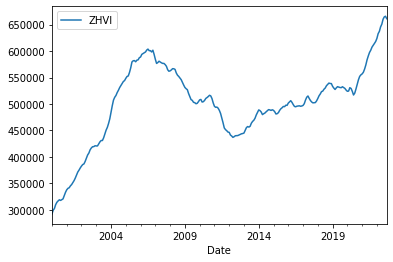

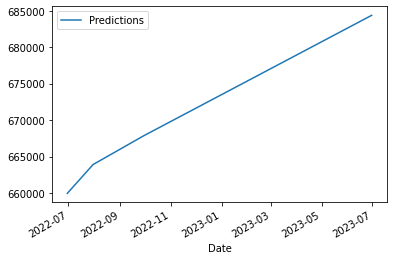

In [16]:
# need same x 
df_cs.set_index('Date').plot()
predictions_df.set_index('Date').plot()

In [19]:
# difference between monthly prediction and true change
month_ahead_zhvi = df_cs[df_cs['Date'] == '2022-07-31']['ZHVI'].values[0]
month_ahead_zhvi

664444.0

In [23]:
predictions_df[predictions_df['Date'] == '2022-07-31']['Predictions'].values[0]

663921.0

In [ ]:
# look at forecasting error
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/